# <font color='green'> Project 2 - Regression Model

### Group number - 27

###### Member 1 : Hareesh Rajendran
###### Member 2 : Saradha Ramakrishnan

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#### Importing all the libraries needed

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.model_selection import GridSearchCV

In [3]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

## <font color='Blue'> Loading the dataset that was perprocessed and cleaned in the project 1.


In [4]:
house_sales = pd.read_csv("house_sales_final.csv")


In [5]:
house_sales.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_renovated,lat,sqft_living15,sqft_lot15,price
0,3.0,2.25,1180.0,5650.0,1.0,0.0,0.0,2.0,1180.0,0.0,0.0,47.5112,1840.0,5650.0,221900
1,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,2.0,2170.0,400.0,1.0,47.7210,1690.0,7639.0,538000
2,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,1.0,770.0,0.0,0.0,47.7379,2720.0,8062.0,180000
3,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,2.0,1050.0,910.0,0.0,47.5208,1360.0,5000.0,604000
4,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,1560.0,0.0,0.0,47.6168,1800.0,7503.0,510000


In [6]:
house_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 15 columns):
bedrooms         21597 non-null float64
bathrooms        21597 non-null float64
sqft_living      21597 non-null float64
sqft_lot         21597 non-null float64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
grade            21597 non-null float64
sqft_above       21597 non-null float64
sqft_basement    21597 non-null float64
yr_renovated     21597 non-null float64
lat              21597 non-null float64
sqft_living15    21597 non-null float64
sqft_lot15       21597 non-null float64
price            21597 non-null int64
dtypes: float64(14), int64(1)
memory usage: 2.5 MB


In [7]:
house_sales.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_renovated,lat,sqft_living15,sqft_lot15,price
count,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,3.357272,2.123721,2070.461453,1.471285e+04,1.490768,0.007223,0.222068,2.399685,1775.905728,293.188117,0.040006,47.560782,1976.985831,12536.780895,5.402029e+05
std,0.906473,0.751601,894.186910,4.026745e+04,0.524861,0.084684,0.748740,0.688440,806.963679,431.300241,0.195977,0.134822,666.735880,26753.972753,3.671337e+05
min,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,0.000000,370.000000,0.000000,0.000000,47.155900,399.000000,651.000000,7.800000e+04
25%,3.000000,1.750000,1450.000000,5.170000e+03,1.000000,0.000000,0.000000,2.000000,1210.000000,0.000000,0.000000,47.480200,1500.000000,5200.000000,3.220000e+05
50%,3.000000,2.250000,1910.000000,7.620000e+03,1.490768,0.000000,0.000000,2.500000,1560.000000,0.000000,0.000000,47.571700,1840.000000,7620.000000,4.500000e+05
75%,4.000000,2.500000,2500.000000,1.036200e+04,2.000000,0.000000,0.000000,3.000000,2160.000000,530.000000,0.000000,47.674100,2320.000000,9920.000000,6.450000e+05
max,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,4.000000,9410.000000,4820.000000,1.000000,47.777600,6210.000000,871200.000000,7.700000e+06


In [8]:
house_sales.shape

(21597, 15)

In [9]:
house_sales.isnull().sum()

bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
grade            0
sqft_above       0
sqft_basement    0
yr_renovated     0
lat              0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

In [10]:
house_sales.isnull().sum().sum()

0

#### Pruning the dataset.

In [11]:
house_sales = house_sales.sample(n=1500,random_state=0)

In [12]:
house_sales.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_renovated,lat,sqft_living15,sqft_lot15,price
156,5.0,3.50,3960.0,25245.0,2.000000,0.0,0.0,3.0,2500.0,1460.0,0.0,47.5250,2640.0,13675.0,650000
15572,4.0,2.25,2070.0,7620.0,1.000000,0.0,0.0,3.0,1390.0,680.0,0.0,47.6970,2110.0,8400.0,625000
2080,3.0,2.50,3090.0,7708.0,2.000000,0.0,0.0,2.5,3090.0,0.0,0.0,47.6868,3140.0,8592.0,822500
17522,3.0,1.75,1910.0,12000.0,1.490768,0.0,0.0,1.0,1230.0,0.0,0.0,47.2878,1550.0,12000.0,179900
8360,4.0,2.75,3150.0,67518.0,1.000000,0.0,0.0,3.0,2250.0,900.0,0.0,47.3382,2210.0,32391.0,370000


In [13]:
house_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 156 to 15415
Data columns (total 15 columns):
bedrooms         1500 non-null float64
bathrooms        1500 non-null float64
sqft_living      1500 non-null float64
sqft_lot         1500 non-null float64
floors           1500 non-null float64
waterfront       1500 non-null float64
view             1500 non-null float64
grade            1500 non-null float64
sqft_above       1500 non-null float64
sqft_basement    1500 non-null float64
yr_renovated     1500 non-null float64
lat              1500 non-null float64
sqft_living15    1500 non-null float64
sqft_lot15       1500 non-null float64
price            1500 non-null int64
dtypes: float64(14), int64(1)
memory usage: 187.5 KB


In [14]:
house_sales.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_renovated,lat,sqft_living15,sqft_lot15,price
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1.500000e+03
mean,3.342667,2.120333,2062.928667,13607.204000,1.474174,0.007333,0.210667,2.399667,1761.514667,286.121195,0.042000,47.562089,1975.591333,12025.102000,5.363627e+05
std,0.862018,0.737597,864.689342,29617.788027,0.527121,0.085349,0.712712,0.673847,788.654903,431.350219,0.200656,0.133434,650.824698,23149.176754,3.585753e+05
min,1.000000,0.750000,480.000000,806.000000,1.000000,0.000000,0.000000,1.000000,480.000000,0.000000,0.000000,47.190000,780.000000,942.000000,9.000000e+04
25%,3.000000,1.750000,1460.000000,5364.750000,1.000000,0.000000,0.000000,2.000000,1217.500000,0.000000,0.000000,47.481400,1500.000000,5250.000000,3.237500e+05
50%,3.000000,2.250000,1910.000000,7620.000000,1.490768,0.000000,0.000000,2.250000,1560.000000,0.000000,0.000000,47.571700,1840.000000,7620.000000,4.500000e+05
75%,4.000000,2.500000,2510.000000,10508.250000,2.000000,0.000000,0.000000,3.000000,2130.000000,530.000000,0.000000,47.674125,2330.000000,10000.000000,6.360575e+05
max,11.000000,6.000000,6900.000000,383328.000000,3.000000,1.000000,4.000000,4.000000,5610.000000,2310.000000,1.000000,47.777400,5790.000000,273556.000000,3.635000e+06


In [15]:
house_sales.shape

(1500, 15)

In [16]:
house_sales.isnull().sum()

bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
grade            0
sqft_above       0
sqft_basement    0
yr_renovated     0
lat              0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

In [17]:
house_sales.isnull().sum().sum()

0

### Ploting Scatterplot to check the Correlation of different features with the Price Column.

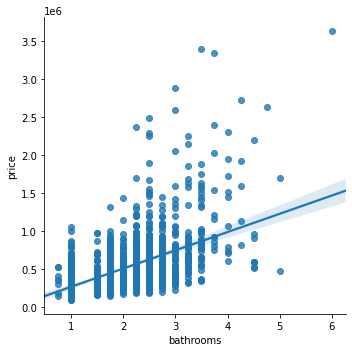

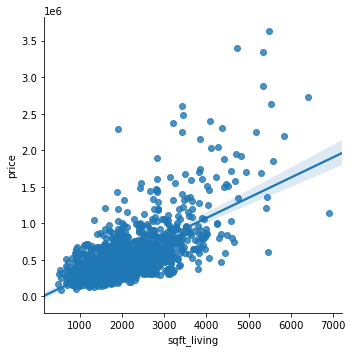

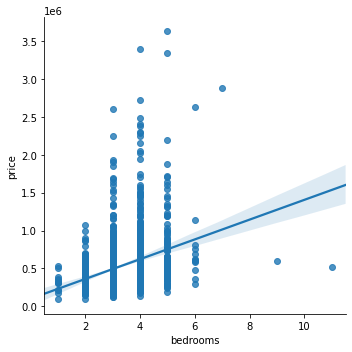

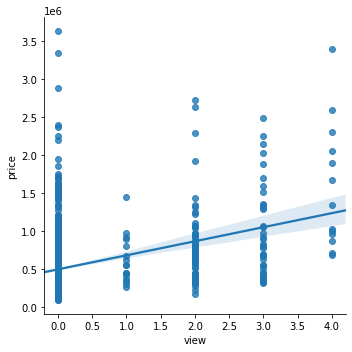

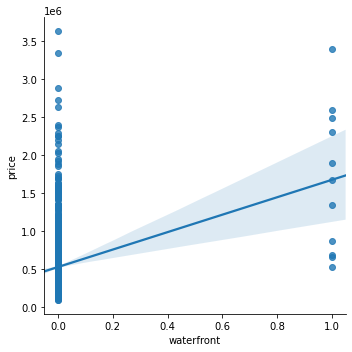

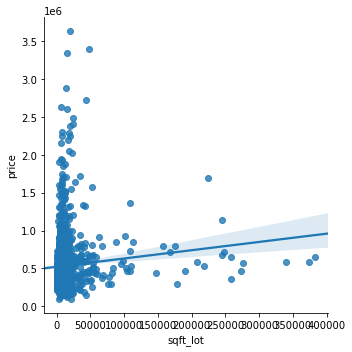

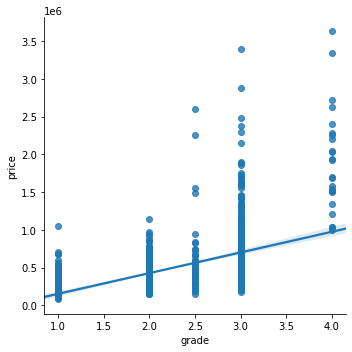

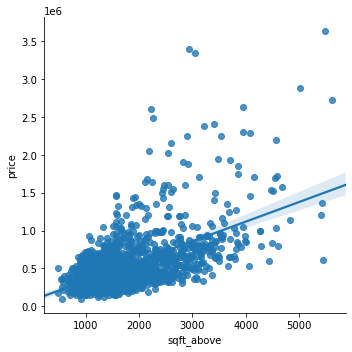

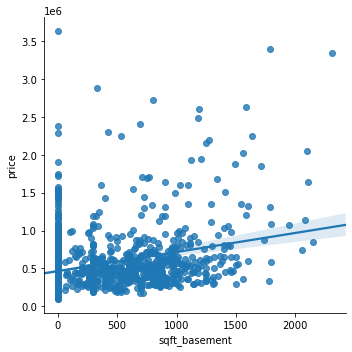

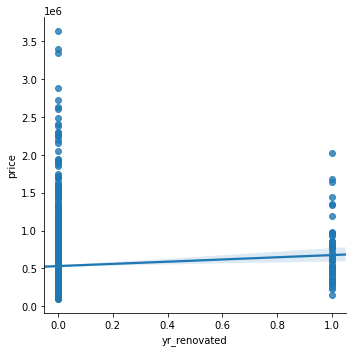

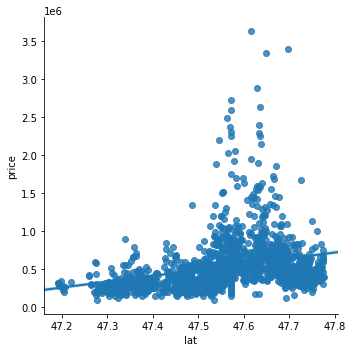

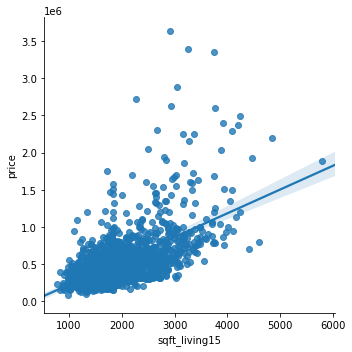

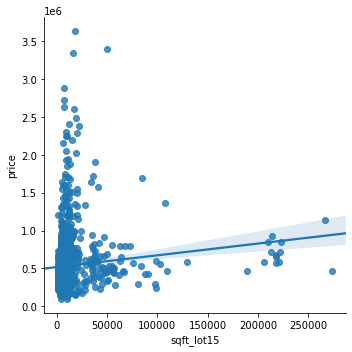

In [18]:
sns.lmplot(x='bathrooms',y='price',data=house_sales)
sns.lmplot(x='sqft_living',y='price',data=house_sales)
sns.lmplot(x='bedrooms',y='price',data=house_sales)
sns.lmplot(x='view',y='price',data=house_sales)
sns.lmplot(x='waterfront',y='price',data=house_sales)
sns.lmplot(x='sqft_lot',y='price',data=house_sales)
sns.lmplot(x='grade',y='price',data=house_sales)
sns.lmplot(x='sqft_above',y='price',data=house_sales)
sns.lmplot(x='sqft_basement',y='price',data=house_sales)
sns.lmplot(x='yr_renovated',y='price',data=house_sales)
sns.lmplot(x='lat',y='price',data=house_sales)
sns.lmplot(x='sqft_living15',y='price',data=house_sales)
sns.lmplot(x='sqft_lot15',y='price',data=house_sales)

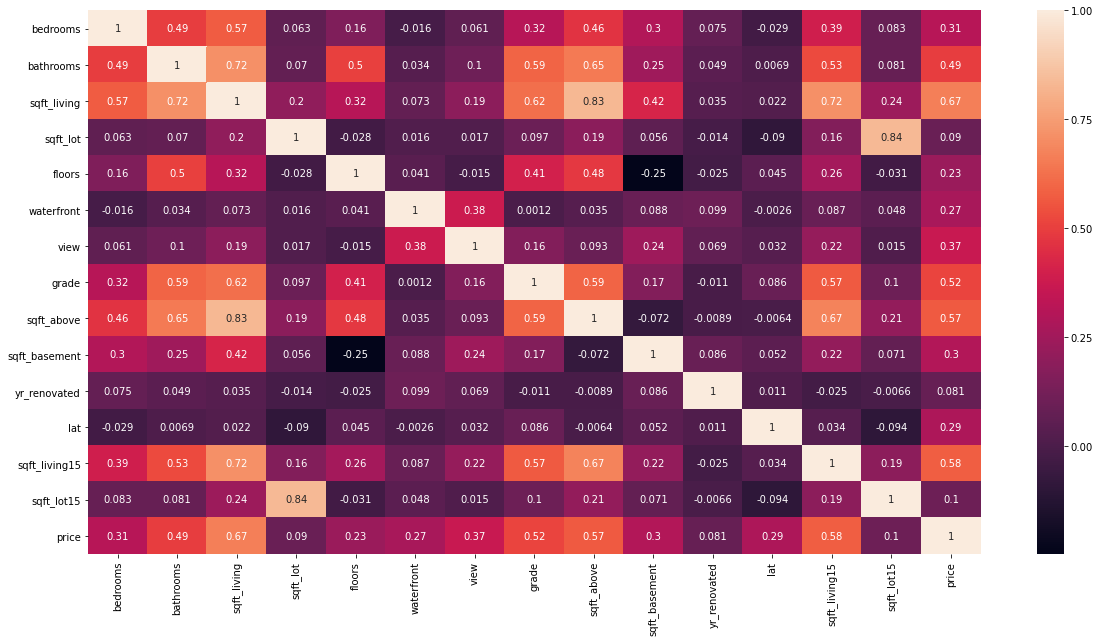

In [19]:
bmcor = house_sales.corr()
a4_dims = (20,10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(bmcor,annot=True)

## <font color='Blue'> Train and Test Split 

In [20]:
X = house_sales.drop(['price'],axis=1)
y = house_sales['price']

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
y_train.shape
y_test.shape
X_train_org.shape
X_test_org.shape

(1125,)

(375,)

(1125, 14)

(375, 14)

### <font color='Blue'> Scaling the Dataset

In [21]:
scaler = StandardScaler()

In [22]:
X_train_scale = scaler.fit_transform(X_train_org)

In [23]:
X_test_scale = scaler.transform(X_test_org)

In [24]:
X_train_scale.shape

(1125, 14)

## <font color='Blue'> Apply any two model with bagging and pasting


### Lasso Regression with bagging

In [25]:
from sklearn.ensemble import BaggingRegressor
lass = Lasso(alpha = 10)
bag_clf = BaggingRegressor(lass,n_estimators=200, max_samples=100, bootstrap=True, random_state=0, oob_score=True)
bag_clf.fit(X_train_org, y_train)
y_pred = bag_clf.predict(X_test_org)
bag_clf.score(X_train_org, y_train)
bag_clf.score(X_test_org, y_test)

c:\users\hareesh\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 479726294046.46875, tolerance: 9190955102.60812
  model = cd_fast.enet_coordinate_descent(
c:\users\hareesh\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10832363315731.943, tolerance: 9703299565.491749
  model = cd_fast.enet_coordinate_descent(
c:\users\hareesh\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 188702882241.7422, tolerance: 15009215210.168814
  model = cd_fast.enet_coordinate_descent(
c:\us

BaggingRegressor(base_estimator=Lasso(alpha=10), max_samples=100,
                 n_estimators=200, oob_score=True, random_state=0)

0.6120420071937577

0.6017228840303759

###### <font color='red'> Lasso regression with bagging
Train score: 0.6120

Test score: 0.60172

### Lasso Regression with pasting

In [26]:
from sklearn.ensemble import BaggingRegressor
lass = Lasso(alpha = 10)
bag_clf = BaggingRegressor(lass,n_estimators=200, max_samples=100, bootstrap=False, random_state=0)
bag_clf.fit(X_train_org, y_train)
y_pred = bag_clf.predict(X_test_org)
bag_clf.score(X_train_org, y_train)
bag_clf.score(X_test_org, y_test)

c:\users\hareesh\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3131484737067.3438, tolerance: 15208652452.296095
  model = cd_fast.enet_coordinate_descent(
c:\users\hareesh\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 112876117572.65625, tolerance: 18418579320.684376
  model = cd_fast.enet_coordinate_descent(
c:\users\hareesh\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12730721122274.137, tolerance: 8900493144.827896
  model = cd_fast.enet_coordinate_descent(
c:

BaggingRegressor(base_estimator=Lasso(alpha=10), bootstrap=False,
                 max_samples=100, n_estimators=200, random_state=0)

0.6122217677829567

0.6011689131806625

##### <font color='red'> Lasso regression with pasting 
Train score: 0.61222

Test score: 0.60117

### KNN regression with bagging

In [27]:
from sklearn.neighbors import KNeighborsRegressor

In [28]:
knn = KNeighborsRegressor(n_neighbors = 10)
bag_clf = BaggingRegressor(knn,n_estimators=200, max_samples=100, bootstrap=True, random_state=0, oob_score=True)
bag_clf.fit(X_train_scale, y_train)

BaggingRegressor(base_estimator=KNeighborsRegressor(n_neighbors=10),
                 max_samples=100, n_estimators=200, oob_score=True,
                 random_state=0)

In [29]:
bag_clf.score(X_train_scale, y_train)
bag_clf.score(X_test_scale, y_test)

0.46585707618200356

0.4360289767505574

##### <font color='red'> KNN regression with bagging 
Train score: 0.4658

Test score: 0.4360

### KNN regression with pasting

In [30]:
bag_clf = BaggingRegressor(knn,n_estimators=20, max_samples=100, bootstrap=False, random_state=0)
bag_clf.fit(X_train_scale, y_train)

BaggingRegressor(base_estimator=KNeighborsRegressor(n_neighbors=10),
                 bootstrap=False, max_samples=100, n_estimators=20,
                 random_state=0)

In [31]:
bag_clf.score(X_train_scale, y_train)
bag_clf.score(X_test_scale, y_test)

0.4645494203923839

0.43444024075866494

##### <font color='red'> KNN regression with pasting 
Train score: 0.4645

Test score: 0.4344

## <font color='Blue'> Any two models with AdaBoosting

### KNN Regression with AdaBoosting

In [32]:
from sklearn.ensemble import AdaBoostRegressor
param_grid = {'learning_rate': [0.1,0.5,1.0]}
ada_clf = AdaBoostRegressor(knn,n_estimators=20)
GridSearch_dtclf = GridSearchCV(ada_clf, param_grid,cv=4,return_train_score=True,n_jobs= -1)

GridSearch_dtclf.fit(X_train_scale, y_train)

GridSearchCV(cv=4,
             estimator=AdaBoostRegressor(base_estimator=KNeighborsRegressor(n_neighbors=10),
                                         n_estimators=20),
             n_jobs=-1, param_grid={'learning_rate': [0.1, 0.5, 1.0]},
             return_train_score=True)

In [33]:
GridSearch_dtclf.best_params_
GridSearch_dtclf.best_score_

{'learning_rate': 0.1}

0.5885807895545462

In [34]:
result_lasso_ada= pd.DataFrame(GridSearch_dtclf.cv_results_)
result_lasso_ada

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.794292,0.011070,0.238113,0.000828,0.1,{'learning_rate': 0.1},0.686871,0.635101,0.428981,0.603369,0.588581,0.096845,1,0.727809,0.755243,0.784647,0.725846,0.748386,0.023945
1,0.795540,0.006161,0.269095,0.004813,0.5,{'learning_rate': 0.5},0.658555,0.588428,0.382881,0.566168,0.549008,0.101793,2,0.847870,0.850897,0.855428,0.827261,0.845364,0.010792
2,0.780549,0.006281,0.241361,0.003568,1,{'learning_rate': 1.0},0.614393,0.550298,0.309844,0.578208,0.513185,0.119578,3,0.852144,0.860129,0.864910,0.841488,0.854668,0.008871


In [35]:
from sklearn.ensemble import AdaBoostRegressor

ada_clf = AdaBoostRegressor(knn,n_estimators=100,learning_rate = 0.1)
ada_clf.fit(X_train_scale, y_train)

AdaBoostRegressor(base_estimator=KNeighborsRegressor(n_neighbors=10),
                  learning_rate=0.1, n_estimators=100)

In [36]:
ada_clf.score(X_train_scale, y_train)
ada_clf.score(X_test_scale, y_test)

0.8480803392381028

0.6130673788275144

##### <font color='red'> KNN regression with AdaBoosting 
Train score: 0.8481

Test score: 0.6131

### Lasso regression with Adaboosting

In [37]:
ada_clf = AdaBoostRegressor(lass, n_estimators=200, learning_rate=0.25, random_state=0)
ada_clf.fit(X_train_org, y_train)
ada_clf.score(X_train_org, y_train)
ada_clf.score(X_test_org, y_test)

AdaBoostRegressor(base_estimator=Lasso(alpha=10), learning_rate=0.25,
                  n_estimators=200, random_state=0)

0.4918967978669656

0.511238201158414

##### <font color='red'> Lasso regression with AdaBoosting
Train score: 0.4919

Test score: 0.5112

### <font color='Blue'> Gradient Boosting

In [38]:
from  sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt.fit(X_train_org, y_train)
gbrt.score(X_train_org, y_train)
gbrt.score(X_test_org, y_test)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3,
                          random_state=42)

0.6566652610580157

0.6524760428627481

##### <font color='red'>Gradient Boosting
Train score: 0.6566

Test score: 0.6525

## <font color='Blue'> Doing PCA on the Dataset

In [110]:
from sklearn.decomposition import PCA

pca = PCA()

X_train_pca = pca.fit_transform(X_train_scale)

pca.explained_variance_ratio_

cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

array([0.31428478, 0.13024617, 0.11312421, 0.08929631, 0.07263878,
       0.07018939, 0.04651687, 0.04265374, 0.03782556, 0.02819541,
       0.02256142, 0.01863677, 0.01121999, 0.00261059])

11

In [111]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 11)
X_train_pca = pca.fit_transform(X_train_scale)
np.sum(pca.explained_variance_ratio_)

0.9675326545460717

In [112]:
X_train_pca = pca.fit_transform(X_train_scale)
X_test_pca = pca.transform(X_test_scale)

In [113]:
X_train_pca.shape

(1125, 11)

## <font color='blue'> Building The Models:  With PCA

## Linear Regression

In [43]:
from sklearn.model_selection import GridSearchCV
model = LinearRegression()
parameters = {'normalize':[True,False]}
grid_search_lr = GridSearchCV(model,parameters, cv=6, return_train_score=True)
grid_search_lr.fit(X_train_pca, y_train)
print("Best parameters: {}".format(grid_search_lr.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_search_lr.best_score_))

GridSearchCV(cv=6, estimator=LinearRegression(),
             param_grid={'normalize': [True, False]}, return_train_score=True)

Best parameters: {'normalize': False}
Best cross-validation score: 0.5837


In [44]:
results = pd.DataFrame(grid_search_lr.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_normalize,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,mean_train_score,std_train_score
0,0.001831,0.000372,0.000500,0.000500,True,{'normalize': True},0.644035,0.461124,0.629625,0.49171,...,0.079791,2,0.608626,0.632559,0.613413,0.633554,0.606273,0.613677,0.618017,0.010947
1,0.001666,0.000471,0.000667,0.000471,False,{'normalize': False},0.644035,0.461124,0.629625,0.49171,...,0.079791,1,0.608626,0.632559,0.613413,0.633554,0.606273,0.613677,0.618017,0.010947


In [45]:
lreg = LinearRegression(normalize = False)
lreg.fit(X_train_pca, y_train)
print(lreg.score(X_train_pca, y_train))
lr_test_score = lreg.score(X_test_pca, y_test)
lr_test_score

LinearRegression()

0.6166928407573682


0.6257219770295974

In [46]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

  
kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(lreg , X_train_pca, y_train, cv=kfold)))
scores = cross_val_score(lreg , X_train_pca, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[0.64403544 0.46112441 0.62962486 0.49170993 0.67721479 0.5984739 ]
0.5836972228598434


LinearRegression()

Text(0.5, 0, 'sqft_living')

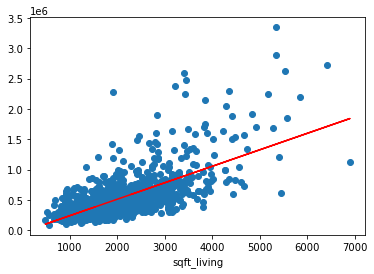

In [47]:
#PLOT

%matplotlib inline
import matplotlib.pyplot as plt

X_train_array = X_train_org.to_numpy()

X_train_rm = X_train_array[:,2].reshape(-1,1)
lreg.fit(X_train_rm, y_train)
y_predict = lreg.predict(X_train_rm)

plt.plot(X_train_rm, y_predict, c = 'r')
plt.scatter(X_train_rm,y_train)
plt.xlabel('sqft_living')

###### <font color='red'>Linear Regression Result:
Best parameter: {'normalize': False}

Average Cross validation score: 0.6167

Test score: 0.6257

## KNN Regression

In [48]:
grid_parms_knn = {'n_neighbors':[1,5,10,15,20]}

In [49]:
knn = KNeighborsRegressor()
grid_search_knn = GridSearchCV(knn, grid_parms_knn,cv=6,return_train_score=True,n_jobs= -1)
grid_search_knn.fit(X_train_pca, y_train)

GridSearchCV(cv=6, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 5, 10, 15, 20]},
             return_train_score=True)

In [50]:
print("Best parameters: {}".format(grid_search_knn.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_search_knn.best_score_))
pd.DataFrame(grid_search_knn.cv_results_)

Best parameters: {'n_neighbors': 5}
Best cross-validation score: 0.5738


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,mean_train_score,std_train_score
0,0.004163,6.877805e-04,0.004832,0.000688,1,{'n_neighbors': 1},0.457618,0.531866,0.560647,0.250198,...,0.101598,5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.004663,1.489769e-03,0.006329,0.001105,5,{'n_neighbors': 5},0.602060,0.617169,0.608077,0.392993,...,0.084336,1,0.722309,0.743373,0.732751,0.762889,0.730158,0.740574,0.738676,0.012829
2,0.004997,1.526686e-03,0.010327,0.005904,10,{'n_neighbors': 10},0.625159,0.621594,0.626329,0.360952,...,0.099099,2,0.650048,0.664430,0.671852,0.707010,0.677887,0.649851,0.670180,0.019452
3,0.004830,1.212391e-03,0.006662,0.000471,15,{'n_neighbors': 15},0.615898,0.590911,0.609538,0.416112,...,0.071993,3,0.616102,0.644116,0.640583,0.672555,0.648796,0.624980,0.641189,0.017994
4,0.003997,4.052337e-07,0.007496,0.000499,20,{'n_neighbors': 20},0.600545,0.579337,0.589000,0.432552,...,0.064090,4,0.589541,0.623593,0.615804,0.648555,0.622902,0.602674,0.617178,0.018414


In [51]:
knn = KNeighborsRegressor(n_neighbors = 5)
knn.fit(X_train_pca, y_train)
print(knn.score(X_train_pca, y_train))
knn_test_score_ = knn.score(X_test_pca, y_test)
knn_test_score_

KNeighborsRegressor()

0.7476118156507462


0.641261171643956

In [52]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

  
kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(knn , X_train_pca, y_train, cv=kfold)))
scores = cross_val_score(knn , X_train_pca, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[0.60206001 0.61716908 0.60807728 0.39299265 0.65203284 0.57070664]
0.5738397485253709


KNeighborsRegressor()

Text(0.5, 0, 'sqft_living')

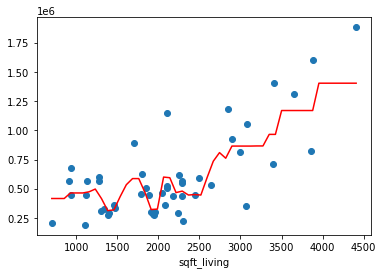

In [54]:
X_b = X_train_array[:50,2].reshape(-1,1)
y_b = y_train[:50]

knn_reg = KNeighborsRegressor(5)
knn_reg.fit(X_b, y_b)

X_new=np.linspace(X_b.min(), X_b.max(), 50).reshape(50, 1)
y_predict = knn_reg.predict(X_new)

plt.plot(X_new, y_predict, c = 'r')
plt.scatter(X_b, y_b)
plt.xlabel('sqft_living')

###### <font color='red'> KNN Regression Result:
Best parameter: {n_neighbors: 5}

Average Cross validation score: 0.7476

Test score: 0.6413

## Ridge Regression

In [55]:
grid_parms_ridge = {'alpha': [0.01, 0.1, 1, 10, 100]}

In [56]:
ridge = Ridge()
grid_search_ridge = GridSearchCV(estimator = ridge,param_grid = grid_parms_ridge,return_train_score=True,n_jobs= -1,cv=5)
grid_search_ridge.fit(X_train_pca, y_train)
print("Best parameters: {}".format(grid_search_ridge.best_params_))

print("Best cross-validation score: {:.4f}".format(grid_search_ridge.best_score_))

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

Best parameters: {'alpha': 100}
Best cross-validation score: 0.5864


In [57]:
ridge = Ridge(alpha = 100)
ridge.fit(X_train_pca, y_train)
print(ridge.score(X_train_pca, y_train))
ridge_test_score_ = ridge.score(X_test_pca, y_test)
ridge_test_score_

Ridge(alpha=100)

0.6154160276765761


0.6189654844318735

In [58]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

  
kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(ridge , X_train_pca, y_train, cv=kfold)))
scores = cross_val_score(ridge , X_train_pca, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[0.63778196 0.48038975 0.63185241 0.49677216 0.68495066 0.58718036]
0.586487883942668


In [59]:
result_ridge = pd.DataFrame(grid_search_ridge.cv_results_)
result_ridge

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.024546,1.269625e-02,0.000399,0.000489,0.01,{'alpha': 0.01},0.640417,0.428589,0.601040,0.625645,...,0.581801,0.077712,5,0.609149,0.639047,0.619258,0.612643,0.609923,0.618004,0.011107
1,0.001999,6.321095e-04,0.000800,0.000400,0.1,{'alpha': 0.1},0.640412,0.428620,0.601040,0.625665,...,0.581809,0.077700,4,0.609149,0.639047,0.619258,0.612643,0.609923,0.618004,0.011107
2,0.002000,9.933790e-07,0.000200,0.000399,1,{'alpha': 1},0.640370,0.428925,0.601042,0.625864,...,0.581882,0.077588,3,0.609148,0.639047,0.619258,0.612643,0.609922,0.618004,0.011107
3,0.002198,9.791511e-04,0.000400,0.000490,10,{'alpha': 10},0.639926,0.431900,0.601024,0.627787,...,0.582573,0.076493,2,0.609126,0.639021,0.619232,0.612618,0.609899,0.617979,0.011106
4,0.001199,3.998519e-04,0.000799,0.000400,100,{'alpha': 100},0.634399,0.455217,0.598599,0.641305,...,0.586374,0.067721,1,0.607371,0.636997,0.617257,0.610631,0.608023,0.616056,0.011040


([<matplotlib.axis.XTick at 0x130c26b8>,
 [Text(0, 0, '0.01'),
  Text(0, 0, '0.1'),
  Text(0, 0, '1'),
  Text(0, 0, '10'),
  Text(0, 0, '100')])

Text(0.5, 0, 'Alpha')

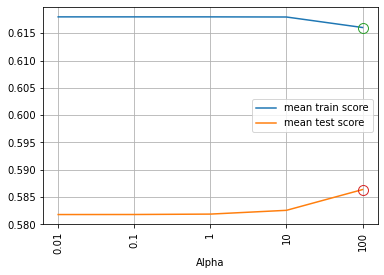

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(result_ridge.shape[0]), result_ridge['mean_train_score'], label = 'mean train score')
plt.plot(range(result_ridge.shape[0]), result_ridge['mean_test_score'], label = 'mean test score')
plt.xticks(range(result_ridge.shape[0]), result_ridge['param_alpha'], rotation = 90)
plt.plot([grid_search_ridge.best_index_], result_ridge['mean_train_score'][grid_search_ridge.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.plot([grid_search_ridge.best_index_], result_ridge['mean_test_score'][grid_search_ridge.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.grid()
plt.legend()
plt.xlabel('Alpha')

###### <font color='red'>Ridge Regression Result:
Best parameter: {'alpha': 100}

Average Cross validation score: 0.6154

Test score: 0.6190

## Lasso Regression

In [61]:
grid_parms_lasso = {'alpha': [0.01, 0.1, 1, 10,100]}

In [62]:
lasso = Lasso()
grid_search_lasso = GridSearchCV(estimator = lasso,param_grid = grid_parms_lasso,return_train_score=True,n_jobs=-1,cv=5)
grid_search_lasso.fit(X_train_pca, y_train)
print("Best parameters: {}".format(grid_search_lasso.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_search_lasso.best_score_))

GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

Best parameters: {'alpha': 100}
Best cross-validation score: 0.5819


In [63]:
lass = Lasso(alpha = 100)
lass.fit(X_train_pca, y_train)
print(lass.score(X_train_pca, y_train))
lass_test_score_ = lass.score(X_test_pca, y_test)
lass_test_score_

Lasso(alpha=100)

0.6166916601866264


0.6255027482780919

In [64]:
lass = Lasso(alpha = 100)
lass.fit(X_train_pca, y_train)
print(lass.score(X_train_pca, y_train))
lass_test_score_ = lass.score(X_test_pca, y_test)
lass_test_score_

Lasso(alpha=100)

0.6166916601866264


0.6255027482780919

In [65]:
result_lasso = pd.DataFrame(grid_search_lasso.cv_results_)
result_lasso

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001998,0.000631,0.000800,0.000400,0.01,{'alpha': 0.01},0.640417,0.428586,0.601040,0.625642,...,0.581801,0.077713,5,0.609149,0.639047,0.619258,0.612643,0.609923,0.618004,0.011107
1,0.001799,0.000400,0.000799,0.000400,0.1,{'alpha': 0.1},0.640417,0.428586,0.601040,0.625643,...,0.581801,0.077713,4,0.609149,0.639047,0.619258,0.612643,0.609923,0.618004,0.011107
2,0.001400,0.000490,0.000999,0.000001,1,{'alpha': 1},0.640416,0.428590,0.601040,0.625646,...,0.581802,0.077711,3,0.609149,0.639047,0.619258,0.612643,0.609923,0.618004,0.011107
3,0.001399,0.000489,0.000800,0.000400,10,{'alpha': 10},0.640410,0.428630,0.601034,0.625681,...,0.581810,0.077696,2,0.609149,0.639047,0.619258,0.612643,0.609923,0.618004,0.011107
4,0.001599,0.000490,0.000600,0.000490,100,{'alpha': 100},0.640343,0.429025,0.600976,0.626025,...,0.581892,0.077550,1,0.609147,0.639046,0.619257,0.612642,0.609921,0.618003,0.011107


([<matplotlib.axis.XTick at 0x439aa30>,
 [Text(0, 0, '0.01'),
  Text(0, 0, '0.1'),
  Text(0, 0, '1'),
  Text(0, 0, '10'),
  Text(0, 0, '100')])

Text(0.5, 0, 'Alpha')

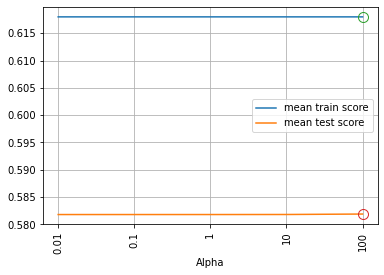

In [66]:
%matplotlib inline

plt.plot(range(result_lasso.shape[0]), result_lasso['mean_train_score'], label = 'mean train score')
plt.plot(range(result_lasso.shape[0]), result_lasso['mean_test_score'], label = 'mean test score')
plt.xticks(range(result_lasso.shape[0]), result_lasso['param_alpha'], rotation = 90)
plt.plot([grid_search_lasso.best_index_], result_lasso['mean_train_score'][grid_search_lasso.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.plot([grid_search_lasso.best_index_], result_lasso['mean_test_score'][grid_search_lasso.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.grid()
plt.legend()
plt.xlabel('Alpha')

##### <font color='red'>Lasso Regression Result:
Best parameter: {'alpha': 100}

Average Cross validation score: 0.6167

Test score: 0.6155

## Polynominal Regression

In [67]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

In [68]:
param_grid_poly = {'polynomialfeatures__degree': np.arange(3)}

grid_poly = GridSearchCV(PolynomialRegression(), param_grid_poly,return_train_score=True,n_jobs=-1,cv=5)

In [69]:
grid_poly.fit(X_train_pca, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'polynomialfeatures__degree': array([0, 1, 2])},
             return_train_score=True)

In [70]:
print("Best parameters: {}".format(grid_poly.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_poly.best_score_))

Best parameters: {'polynomialfeatures__degree': 1}
Best cross-validation score: 0.5818


In [71]:
pol = PolynomialFeatures(degree = 1)
X_pol = pol.fit_transform(X_train_pca)
Xt_pol = pol.fit_transform(X_test_pca)
pol_reg = LinearRegression()
pol_reg.fit(X_pol,y_train)
print(pol_reg.score(X_pol, y_train))
pol_reg_test_score = pol_reg.score(Xt_pol, y_test)
pol_reg_test_score

LinearRegression()

0.6166928407573682


0.6257219770295974

In [72]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

  
kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(pol_reg , X_pol, y_train, cv=kfold)))
scores = cross_val_score(pol_reg , X_pol, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[0.64403544 0.46112441 0.62962486 0.49170993 0.67721479 0.5984739 ]
0.5836972228598433


In [73]:
result_poly = pd.DataFrame(grid_poly.cv_results_)
result_poly

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_polynomialfeatures__degree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001599,0.000489,0.000000,0.000000e+00,0,{'polynomialfeatures__degree': 0},NaN,NaN,NaN,NaN,...,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.003598,0.001742,0.001000,7.747687e-07,1,{'polynomialfeatures__degree': 1},0.640417,0.428586,0.601040,0.625642,...,0.581801,0.077713,1,0.609149,0.639047,0.619258,0.612643,0.609923,0.618004,0.011107
2,0.013392,0.000489,0.001199,7.476032e-04,2,{'polynomialfeatures__degree': 2},-81.689060,-1.439630,-1.905223,-88.371579,...,-39.305890,38.205480,2,0.753624,0.769363,0.768435,0.766545,0.740095,0.759612,0.011294


([<matplotlib.axis.XTick at 0x43f10b8>,
 [Text(0, 0, '0'), Text(0, 0, '1'), Text(0, 0, '2')])

Text(0.5, 0, 'Degree')

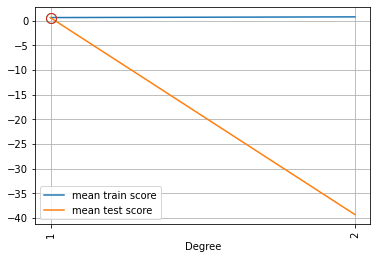

In [74]:
plt.plot(range(result_poly.shape[0]), result_poly['mean_train_score'], label = 'mean train score')
plt.plot(range(result_poly.shape[0]), result_poly['mean_test_score'], label = 'mean test score')
plt.xticks(range(result_poly.shape[0]), result_poly['param_polynomialfeatures__degree'], rotation = 90)
plt.plot([grid_poly.best_index_], result_poly['mean_train_score'][grid_poly.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.plot([grid_poly.best_index_], result_poly['mean_test_score'][grid_poly.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.grid()
plt.xlabel('Degree')
plt.legend()

##### <font color='red'>Polynominal Regression Result:
Best parameters: {'polynomialfeatures__degree': 2}

Average Cross validation score: 0.6167

Test score: 0.6257

## Linear (Simple) SVR

In [114]:
grid_parms_svrl = {'C': [0.01, 0.1, 1, 10, 100], 'epsilon' : [0.01, 0.1, 1, 10, 100]}

In [115]:
linearsvr = LinearSVR()
grid_svrl = GridSearchCV(estimator = linearsvr,param_grid = grid_parms_svrl,return_train_score=True,n_jobs= -1,cv=10)

In [116]:
grid_svrl.fit(X_train_pca,y_train)

GridSearchCV(cv=10, estimator=LinearSVR(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'epsilon': [0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [117]:
print("Best parameters: {}".format(grid_svrl.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_svrl.best_score_))

Best parameters: {'C': 100, 'epsilon': 0.1}
Best cross-validation score: -1.6455


In [119]:
lsvr = LinearSVR(C = 100, epsilon = 0.1)
        
lsvr.fit(X_train_pca, y_train)

print(lsvr.score(X_train_pca, y_train))
lsvr_test_score = lsvr.score(X_test_pca, y_test)
lsvr_test_score

LinearSVR(C=100, epsilon=0.1)

-1.3846892633054169


-1.397794246454784

In [120]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

  
kfold = KFold(n_splits=10)
print("Cross-validation scores:\n{}".format(cross_val_score(lsvr , X_train_pca, y_train, cv=kfold)))
scores = cross_val_score(lsvr, X_train_pca, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[-1.65280723 -1.35421356 -1.90139153 -2.22058643 -1.32711955 -1.40080358
 -2.23230145 -1.87375912 -1.04268608 -1.44965349]
-1.6455624716923307


In [121]:
result_linearsvr = pd.DataFrame(grid_svrl.cv_results_)
result_linearsvr

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_epsilon,params,split0_test_score,split1_test_score,split2_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.001499,4.993444e-04,0.000800,0.000400,0.01,0.01,"{'C': 0.01, 'epsilon': 0.01}",-2.464116,-2.077889,-3.078705,...,-2.196920,-2.160956,-2.269630,-2.250548,-2.191856,-2.191758,-2.433135,-2.264281,-2.243566,0.072408
1,0.001399,4.894443e-04,0.000600,0.000489,0.01,0.1,"{'C': 0.01, 'epsilon': 0.1}",-2.464116,-2.077889,-3.078705,...,-2.196920,-2.160956,-2.269630,-2.250548,-2.191856,-2.191758,-2.433135,-2.264281,-2.243566,0.072408
2,0.001200,3.997803e-04,0.000800,0.000400,0.01,1,"{'C': 0.01, 'epsilon': 1}",-2.464116,-2.077889,-3.078705,...,-2.196920,-2.160956,-2.269630,-2.250548,-2.191856,-2.191758,-2.433135,-2.264281,-2.243566,0.072408
3,0.001299,4.580060e-04,0.000600,0.000490,0.01,10,"{'C': 0.01, 'epsilon': 10}",-2.464116,-2.077889,-3.078705,...,-2.196920,-2.160956,-2.269630,-2.250548,-2.191856,-2.191758,-2.433135,-2.264281,-2.243566,0.072408
4,0.001299,4.577094e-04,0.000700,0.000458,0.01,100,"{'C': 0.01, 'epsilon': 100}",-2.464116,-2.077889,-3.078705,...,-2.196920,-2.160956,-2.269630,-2.250548,-2.191856,-2.191758,-2.433135,-2.264281,-2.243566,0.072408
5,0.001400,4.899794e-04,0.000800,0.000400,0.1,0.01,"{'C': 0.1, 'epsilon': 0.01}",-2.463319,-2.077175,-3.077525,...,-2.196159,-2.160223,-2.268840,-2.249779,-2.191086,-2.191026,-2.432310,-2.263528,-2.242799,0.072386
6,0.000999,5.746828e-07,0.000800,0.000400,0.1,0.1,"{'C': 0.1, 'epsilon': 0.1}",-2.463319,-2.077175,-3.077525,...,-2.196159,-2.160223,-2.268840,-2.249779,-2.191086,-2.191026,-2.432310,-2.263528,-2.242799,0.072386
7,0.001699,2.098783e-03,0.000799,0.000400,0.1,1,"{'C': 0.1, 'epsilon': 1}",-2.463319,-2.077175,-3.077525,...,-2.196159,-2.160223,-2.268840,-2.249779,-2.191086,-2.191026,-2.432310,-2.263528,-2.242799,0.072386
8,0.001399,9.157776e-04,0.000700,0.000458,0.1,10,"{'C': 0.1, 'epsilon': 10}",-2.463319,-2.077175,-3.077525,...,-2.196159,-2.160223,-2.268840,-2.249779,-2.191086,-2.191026,-2.432310,-2.263528,-2.242799,0.072386
9,0.001299,4.578867e-04,0.001200,0.001661,0.1,100,"{'C': 0.1, 'epsilon': 100}",-2.463319,-2.077175,-3.077525,...,-2.196159,-2.160223,-2.268840,-2.249779,-2.191086,-2.191026,-2.432310,-2.263528,-2.242799,0.072386


([<matplotlib.axis.XTick at 0x4480b50>,
 [Text(0, 0, '0.01'),
  Text(0, 0, '0.01'),
  Text(0, 0, '0.01'),
  Text(0, 0, '0.01'),
  Text(0, 0, '0.01'),
  Text(0, 0, '0.1'),
  Text(0, 0, '0.1'),
  Text(0, 0, '0.1'),
  Text(0, 0, '0.1'),
  Text(0, 0, '0.1'),
  Text(0, 0, '1'),
  Text(0, 0, '1'),
  Text(0, 0, '1'),
  Text(0, 0, '1'),
  Text(0, 0, '1'),
  Text(0, 0, '10'),
  Text(0, 0, '10'),
  Text(0, 0, '10'),
  Text(0, 0, '10'),
  Text(0, 0, '10'),
  Text(0, 0, '100'),
  Text(0, 0, '100'),
  Text(0, 0, '100'),
  Text(0, 0, '100'),
  Text(0, 0, '100')])

Text(0.5, 0, 'Alpha')

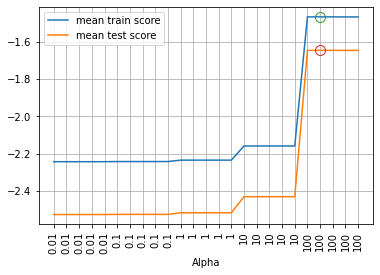

In [122]:
plt.plot(range(result_linearsvr.shape[0]), result_linearsvr['mean_train_score'], label = 'mean train score')
plt.plot(range(result_linearsvr.shape[0]), result_linearsvr['mean_test_score'], label = 'mean test score')
plt.xticks(range(result_linearsvr.shape[0]), result_linearsvr['param_C'], rotation = 90)
plt.plot([grid_svrl.best_index_], result_linearsvr['mean_train_score'][grid_svrl.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.plot([grid_svrl.best_index_], result_linearsvr['mean_test_score'][grid_svrl.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.grid()
plt.legend()
plt.xlabel('Alpha')

##### <font color='red'>Linear (Simple) SVR Result:
Best parameters: {'C': 100, 'epsilon': 0.1}

Average Cross validation score: 0.5548

Test score: 0.5714

## SVR with kernel 'Linear'

In [123]:
grid_parms_linear = {'C': [0.01,0.1, 1, 10, 100]}

In [124]:
svr_linear = SVR(kernel='linear')
grid_svr_linear = GridSearchCV(estimator = svr_linear,param_grid = grid_parms_linear,return_train_score=True,n_jobs= -1,cv=6)

In [125]:
grid_svr_linear.fit(X_train_pca,y_train)

GridSearchCV(cv=6, estimator=SVR(kernel='linear'), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [126]:
print("Best parameters: {}".format(grid_svr_linear.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_svr_linear.best_score_))

Best parameters: {'C': 100}
Best cross-validation score: 0.3483


In [127]:
svr = SVR(kernel = 'linear',C = 100)
        
        #train the model
svr.fit(X_train_pca, y_train)
        
        #evaluate the model
print(svr.score(X_train_pca, y_train))
svr_test_score = svr.score(X_test_pca, y_test)
svr_test_score

SVR(C=100, kernel='linear')

0.370117807434416


0.3488324099490292

In [128]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(svr , X_train_pca, y_train, cv=kfold)))
scores = cross_val_score(svr , X_train_pca, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[0.3035794  0.4024692  0.35342362 0.35154009 0.40380224 0.27526754]
0.3483470138561307


In [129]:
result_svr_linear = pd.DataFrame(grid_svr_linear.cv_results_)
result_svr_linear

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,mean_train_score,std_train_score
0,0.053301,0.007884,0.005164,0.000373,0.01,{'C': 0.01},-0.087878,-0.017400,-0.058762,-0.030698,...,0.029197,5,-0.048922,-0.056969,-0.062263,-0.060070,-0.056428,-0.046847,-0.055250,0.005589
1,0.050471,0.006797,0.004664,0.000471,0.1,{'C': 0.1},-0.087098,-0.016610,-0.057708,-0.029815,...,0.029261,4,-0.048103,-0.056347,-0.061241,-0.059168,-0.055630,-0.046136,-0.054437,0.005519
2,0.043974,0.000577,0.004498,0.000500,1,{'C': 1},-0.079329,-0.007993,-0.048419,-0.021031,...,0.030128,3,-0.039946,-0.049050,-0.052201,-0.050182,-0.047683,-0.039246,-0.046385,0.004991
3,0.046473,0.002871,0.004664,0.000471,10,{'C': 10},-0.007350,0.074936,0.025219,0.053760,...,0.035042,2,0.035054,0.025903,0.019747,0.026113,0.024057,0.035115,0.027665,0.005647
4,0.043641,0.002807,0.003997,0.001000,100,{'C': 100},0.303579,0.402469,0.353424,0.351540,...,0.047232,1,0.348757,0.350121,0.336561,0.359644,0.327000,0.351926,0.345668,0.010765


([<matplotlib.axis.XTick at 0x13267af0>,
 [Text(0, 0, '0.01'),
  Text(0, 0, '0.1'),
  Text(0, 0, '1'),
  Text(0, 0, '10'),
  Text(0, 0, '100')])

Text(0.5, 0, 'C')

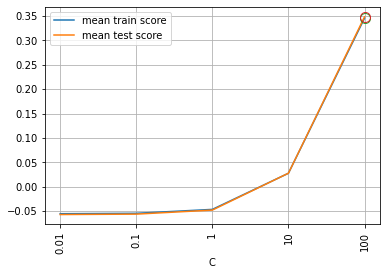

In [130]:
plt.plot(range(result_svr_linear.shape[0]), result_svr_linear['mean_train_score'], label = 'mean train score')
plt.plot(range(result_svr_linear.shape[0]), result_svr_linear['mean_test_score'], label = 'mean test score')
plt.xticks(range(result_svr_linear.shape[0]), result_svr_linear['param_C'], rotation = 90)
plt.plot([grid_svr_linear.best_index_], result_svr_linear['mean_train_score'][grid_svr_linear.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.plot([grid_svr_linear.best_index_], result_svr_linear['mean_test_score'][grid_svr_linear.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.grid()
plt.legend()
plt.xlabel('C')

##### <font color='red'>SVR with Kernel as 'Linear' Result:
Best parameters: {'C': 100}

Average Cross validation score: 0.6313

Test score: 0.6353

## SVR with kernel 'Poly'

In [131]:
grid_parms_svrp = {'C': [1, 10, 100],'degree':[1,3]}

In [132]:
svr_poly = SVR(kernel='poly')
grid_svr_poly = GridSearchCV(estimator = svr_poly,param_grid = grid_parms_svrp,return_train_score=True,n_jobs= -1,cv=3)

In [133]:
grid_svr_poly.fit(X_train_pca,y_train)

GridSearchCV(cv=3, estimator=SVR(kernel='poly'), n_jobs=-1,
             param_grid={'C': [1, 10, 100], 'degree': [1, 3]},
             return_train_score=True)

In [134]:
print("Best parameters: {}".format(grid_svr_poly.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_svr_poly.best_score_))
pd.DataFrame(grid_svr_poly.cv_results_)

Best parameters: {'C': 100, 'degree': 3}
Best cross-validation score: 0.0745


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.039642,0.006596,0.008662,2.355110e-03,1,1,"{'C': 1, 'degree': 1}",-0.043316,-0.045543,-0.072555,-0.053805,0.013290,6,-0.050506,-0.064951,-0.045839,-0.053765,0.008136
1,0.043309,0.008725,0.008328,4.685056e-04,1,3,"{'C': 1, 'degree': 3}",-0.042235,-0.043375,-0.070912,-0.052174,0.013258,5,-0.048327,-0.062978,-0.044103,-0.051803,0.008088
2,0.043307,0.007842,0.008330,4.713705e-04,10,1,"{'C': 10, 'degree': 1}",-0.038785,-0.040221,-0.068976,-0.049328,0.013906,4,-0.045836,-0.059884,-0.042076,-0.049265,0.007664
3,0.032981,0.002827,0.008329,4.715952e-04,10,3,"{'C': 10, 'degree': 3}",-0.029071,-0.023081,-0.054786,-0.035646,0.013753,3,-0.025736,-0.042426,-0.029611,-0.032591,0.007132
4,0.033979,0.004963,0.007330,4.718200e-04,100,1,"{'C': 100, 'degree': 1}",0.007630,0.008557,-0.025928,-0.003247,0.016042,2,0.001891,-0.013183,0.002017,-0.003092,0.007136
5,0.031981,0.000817,0.006995,4.052337e-07,100,3,"{'C': 100, 'degree': 3}",0.055044,0.105270,0.063127,0.074481,0.022020,1,0.101214,0.102419,0.055997,0.086543,0.021605


In [135]:
svr_p = SVR(kernel='poly',C=100,degree = 3)
svr_p.fit(X_train_pca, y_train)
svr_p.score(X_train_pca, y_train)
svrp_test_score = svr_p.score(X_test_pca, y_test)
svrp_test_score

SVR(C=100, kernel='poly')

0.12711181962616502

0.1226170921085884

In [136]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
#scores = cross_val_score(logreg, iris.data, iris.target)
kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(svr_p, X_train_pca, y_train, cv=kfold)))
scores = cross_val_score(svr_p, X_train_pca, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[0.06474523 0.07522798 0.12947435 0.07070195 0.18075962 0.04054971]
0.09357647168708433


In [137]:
result_svr_poly= pd.DataFrame(grid_svr_poly.cv_results_)
result_svr_poly

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.039642,0.006596,0.008662,2.355110e-03,1,1,"{'C': 1, 'degree': 1}",-0.043316,-0.045543,-0.072555,-0.053805,0.013290,6,-0.050506,-0.064951,-0.045839,-0.053765,0.008136
1,0.043309,0.008725,0.008328,4.685056e-04,1,3,"{'C': 1, 'degree': 3}",-0.042235,-0.043375,-0.070912,-0.052174,0.013258,5,-0.048327,-0.062978,-0.044103,-0.051803,0.008088
2,0.043307,0.007842,0.008330,4.713705e-04,10,1,"{'C': 10, 'degree': 1}",-0.038785,-0.040221,-0.068976,-0.049328,0.013906,4,-0.045836,-0.059884,-0.042076,-0.049265,0.007664
3,0.032981,0.002827,0.008329,4.715952e-04,10,3,"{'C': 10, 'degree': 3}",-0.029071,-0.023081,-0.054786,-0.035646,0.013753,3,-0.025736,-0.042426,-0.029611,-0.032591,0.007132
4,0.033979,0.004963,0.007330,4.718200e-04,100,1,"{'C': 100, 'degree': 1}",0.007630,0.008557,-0.025928,-0.003247,0.016042,2,0.001891,-0.013183,0.002017,-0.003092,0.007136
5,0.031981,0.000817,0.006995,4.052337e-07,100,3,"{'C': 100, 'degree': 3}",0.055044,0.105270,0.063127,0.074481,0.022020,1,0.101214,0.102419,0.055997,0.086543,0.021605


([<matplotlib.axis.XTick at 0x1321cd00>,
 [Text(0, 0, '1'),
  Text(0, 0, '1'),
  Text(0, 0, '10'),
  Text(0, 0, '10'),
  Text(0, 0, '100'),
  Text(0, 0, '100')])

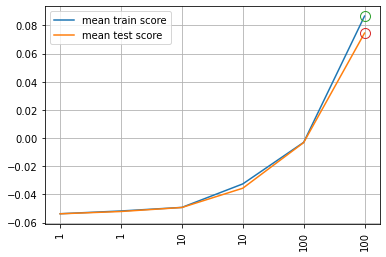

In [138]:
plt.plot(range(result_svr_poly.shape[0]), result_svr_poly['mean_train_score'], label = 'mean train score')
plt.plot(range(result_svr_poly.shape[0]), result_svr_poly['mean_test_score'], label = 'mean test score')
plt.xticks(range(result_svr_poly.shape[0]), result_svr_poly['param_C'], rotation = 90)
plt.plot([grid_svr_poly.best_index_], result_svr_poly['mean_train_score'][grid_svr_poly.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.plot([grid_svr_poly.best_index_], result_svr_poly['mean_test_score'][grid_svr_poly.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.grid()
plt.legend()

##### <font color='red'>SVR with Kernel as 'Poly' Result:
Best parameters: {'C': 100, 'degree': 3}

Average Cross validation score: 0.2491

Test score: 0.2900

## SVR with kernel 'rbf'

In [139]:
grid_parms_rbf = {'C': [0.1, 1, 10, 100],'gamma':[0.1, 1, 10, 100]}

In [140]:
svr_rbf = SVR(kernel='rbf')
grid_svr_rbf = GridSearchCV(estimator = svr_rbf,param_grid = grid_parms_rbf,return_train_score=True,n_jobs= -1,cv=3)

In [141]:
grid_svr_rbf.fit(X_train_pca,y_train)

GridSearchCV(cv=3, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 10, 100]},
             return_train_score=True)

In [142]:
print("Best parameters: {}".format(grid_svr_rbf.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_svr_rbf.best_score_))

Best parameters: {'C': 100, 'gamma': 0.1}
Best cross-validation score: -0.0421


In [143]:
svr_rbf = SVR(kernel='rbf',C=100,gamma=0.1)
svr_rbf.fit(X_train_pca, y_train)
svr_rbf.score(X_train_pca, y_train)
svr_rbf_test_score = svr_rbf.score(X_test_pca, y_test)
svr_rbf_test_score

SVR(C=100, gamma=0.1)

-0.03690401593219206

-0.0493671575314254

In [144]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(svr_rbf, X_train_pca, y_train, cv=kfold)))
scores = cross_val_score(svr_rbf, X_train_pca, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[-0.07443357  0.00324388 -0.04008967 -0.01236599 -0.02482984 -0.09094385]
-0.03990317396015094


In [145]:
result_rbf = pd.DataFrame(grid_svr_rbf.cv_results_)
result_rbf

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.043308,5.433964e-03,0.011327,4.712583e-04,0.1,0.1,"{'C': 0.1, 'gamma': 0.1}",-0.043809,-0.046133,-0.072939,-0.054294,0.013218,6,-0.051015,-0.065514,-0.046242,-0.054257,0.008195
1,0.054300,4.495025e-03,0.012660,9.416170e-04,0.1,1,"{'C': 0.1, 'gamma': 1}",-0.043820,-0.046148,-0.072943,-0.054304,0.013214,8,-0.051025,-0.065527,-0.046248,-0.054267,0.008198
2,0.112601,4.918506e-03,0.013325,4.714266e-04,0.1,10,"{'C': 0.1, 'gamma': 10}",-0.043821,-0.046150,-0.072944,-0.054305,0.013214,9,-0.051026,-0.065529,-0.046249,-0.054268,0.008198
3,0.076289,1.246789e-03,0.026984,8.158534e-04,0.1,100,"{'C': 0.1, 'gamma': 100}",-0.043821,-0.046150,-0.072944,-0.054305,0.013214,11,-0.051026,-0.065529,-0.046249,-0.054268,0.008198
4,0.036645,9.422350e-04,0.011327,4.714266e-04,1,0.1,"{'C': 1, 'gamma': 0.1}",-0.043697,-0.045986,-0.072895,-0.054193,0.013258,4,-0.050916,-0.065375,-0.046173,-0.054155,0.008167
5,0.040643,1.246279e-03,0.011327,4.711456e-04,1,1,"{'C': 1, 'gamma': 1}",-0.043812,-0.046132,-0.072939,-0.054294,0.013218,7,-0.051015,-0.065509,-0.046238,-0.054254,0.008194
6,0.105605,4.494572e-03,0.013326,4.712580e-04,1,10,"{'C': 1, 'gamma': 10}",-0.043821,-0.046149,-0.072945,-0.054305,0.013215,10,-0.051023,-0.065526,-0.046246,-0.054265,0.008198
7,0.078288,2.053547e-03,0.026984,1.123916e-07,1,100,"{'C': 1, 'gamma': 100}",-0.043821,-0.046150,-0.072945,-0.054305,0.013214,13,-0.051023,-0.065526,-0.046247,-0.054265,0.008198
8,0.035646,4.711456e-04,0.011660,4.714828e-04,10,0.1,"{'C': 10, 'gamma': 0.1}",-0.042583,-0.044518,-0.072460,-0.053187,0.013651,2,-0.049922,-0.063990,-0.045489,-0.053134,0.007887
9,0.041643,2.355840e-03,0.010993,3.893359e-07,10,1,"{'C': 10, 'gamma': 1}",-0.043728,-0.045970,-0.072899,-0.054199,0.013254,5,-0.050917,-0.065330,-0.046138,-0.054128,0.008158


([<matplotlib.axis.XTick at 0x44ae178>,
 [Text(0, 0, '0.1'),
  Text(0, 0, '0.1'),
  Text(0, 0, '0.1'),
  Text(0, 0, '0.1'),
  Text(0, 0, '1'),
  Text(0, 0, '1')])

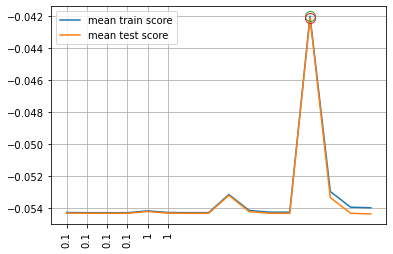

In [146]:
plt.plot(range(result_rbf.shape[0]), result_rbf['mean_train_score'], label = 'mean train score')
plt.plot(range(result_rbf.shape[0]), result_rbf['mean_test_score'], label = 'mean test score')
plt.xticks(range(result_svr_poly.shape[0]), result_rbf['param_C'], rotation = 90)
plt.plot([grid_svr_rbf.best_index_], result_rbf['mean_train_score'][grid_svr_rbf.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.plot([grid_svr_rbf.best_index_], result_rbf['mean_test_score'][grid_svr_rbf.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.grid()
plt.legend()

##### <font color='red'>SVR with Kernel as 'rbf' Result:
Best parameters: {'C': 100, 'gamma': 0.1}

Average Cross validation score: -0.0372

Test score: -0.0345

## Decision Tree


In [147]:
from sklearn.tree import DecisionTreeRegressor

dtree_clf = DecisionTreeRegressor(random_state=0)
parameters = { 'max_depth' : [1,2,3,4,5,6,7,8,9,10]}

In [148]:
grid_search = GridSearchCV(dtree_clf,parameters, cv=6 )
grid_search.fit(X_train_pca, y_train)

GridSearchCV(cv=6, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [149]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'max_depth': 6}
Best cross-validation score: 0.48


In [150]:
dtree = DecisionTreeRegressor(max_depth=6, random_state=0)
dtree.fit(X_train_pca, y_train)

print("Accuracy on training set: {:.3f}".format(dtree.score(X_train_pca, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test_pca, y_test)))

DecisionTreeRegressor(max_depth=6, random_state=0)

Accuracy on training set: 0.848
Accuracy on test set: 0.592


## <font color='blue'> Scores With PCA & without PCA

###### After applying PCA, it helped the model to run quicker and obtain the result. When comparing the result, it is almost the same for the models when ran without applying PCA. But, the model without PCA has a slightly better scores compared than the scores with PCA.

## <font color='blue'> Deep Learning Model

## Grid search to find best parameters

In [55]:
from keras.models import Sequential
from keras.layers import Dense

# fix random seed for reproducibility
np.random.seed(10)

In [56]:
# create model
def create_model():

    model = Sequential()
    model.add(Dense(14, input_dim=14, kernel_initializer='normal', activation='relu'))
    model.add(Dense(8, activation='relu')) #hidden layer
    model.add(Dense(1, kernel_initializer='normal'))
    #model.add(Dense(1, activation='sigmoid')) #output layer
    model.compile(loss='mse', optimizer='adam' , metrics = ['mse'])
    return model

In [57]:
from sklearn.model_selection import GridSearchCV
model = create_model

In [59]:
from keras import backend as K
X_train1 = K.cast_to_floatx(X_train_org)
y_train1 = K.cast_to_floatx(y_train)

In [60]:
from keras.wrappers.scikit_learn import KerasRegressor
model = KerasRegressor(build_fn = create_model, verbose = 0)

param_grid = {'batch_size':[10,20,30,40] , 'epochs':[10, 50, 100, 150]}
grid_cv = GridSearchCV(estimator= model, param_grid = param_grid, cv = 5)
grid_cv.fit(X_train1,y_train1)
grid_cv.best_params_

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x0000024F8463B708>,
             iid='warn', n_jobs=None,
             param_grid={'batch_size': [10, 20, 30, 40],
                         'epochs': [10, 50, 100, 150]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

{'batch_size': 20, 'epochs': 150}

In [61]:
model = create_model()
model.fit(X_train1, y_train1, epochs=150, batch_size=20)

Epoch 1/150
57/57 [==============================] - 0s 682us/step - loss: 411714387968.0000 - mse: 411714387968.0000
Epoch 2/150
57/57 [==============================] - 0s 543us/step - loss: 410190807040.0000 - mse: 410190807040.0000
Epoch 3/150
57/57 [==============================] - 0s 665us/step - loss: 402433671168.0000 - mse: 402433671168.0000
Epoch 4/150
57/57 [==============================] - 0s 577us/step - loss: 380984590336.0000 - mse: 380984590336.0000
Epoch 5/150
57/57 [==============================] - 0s 647us/step - loss: 345167265792.0000 - mse: 345167265792.0000
Epoch 6/150
57/57 [==============================] - 0s 630us/step - loss: 319422660608.0000 - mse: 319422660608.0000
Epoch 7/150
57/57 [==============================] - 0s 630us/step - loss: 307297189888.0000 - mse: 307297189888.0000
Epoch 8/150
57/57 [==============================] - 0s 630us/step - loss: 299349049344.0000 - mse: 299349049344.0000
Epoch 9/150
57/57 [==============================] - 0s 

57/57 [==============================] - 0s 1ms/step - loss: 67874316288.0000 - mse: 67874316288.0000
Epoch 140/150
57/57 [==============================] - 0s 998us/step - loss: 67706818560.0000 - mse: 67706818560.0000
Epoch 141/150
57/57 [==============================] - 0s 986us/step - loss: 67633819648.0000 - mse: 67633819648.0000
Epoch 142/150
57/57 [==============================] - 0s 931us/step - loss: 67567083520.0000 - mse: 67567083520.0000
Epoch 143/150
57/57 [==============================] - 0s 892us/step - loss: 67627986944.0000 - mse: 67627986944.0000
Epoch 144/150
57/57 [==============================] - 0s 904us/step - loss: 67551281152.0000 - mse: 67551281152.0000
Epoch 145/150
57/57 [==============================] - 0s 962us/step - loss: 67642998784.0000 - mse: 67642998784.0000
Epoch 146/150
57/57 [==============================] - 0s 927us/step - loss: 67575398400.0000 - mse: 67575398400.0000
Epoch 147/150
57/57 [==============================] - 0s 1ms/step - los

In [63]:
from keras import backend as K
X_test1 = K.cast_to_floatx(X_test_org)
y_test1 = K.cast_to_floatx(y_test)

In [64]:
model.evaluate(X_test1, y_test1)

12/12 [==============================] - 0s 582us/step - loss: 72575270912.0000 - mse: 72575270912.0000


[72575270912.0, 72575270912.0]

In [65]:
from sklearn.metrics import r2_score, recall_score, precision_score

y_train_predict = model.predict(X_train1)
y_test_predict = model.predict(X_test1)

In [66]:
print('Train score: {:.2f}'.format((r2_score(y_train, y_train_predict))*100)+ "%")
print('Test score: {:.2f}'.format((r2_score(y_test, y_test_predict))*100)+ "%")

Train score: 46.96%
Test score: 45.25%


In [67]:
y_test_predict

array([[ 332696.66],
       [ 928737.75],
       [ 407137.16],
       [ 306780.12],
       [ 393361.  ],
       [ 343490.03],
       [ 240049.62],
       [ 510508.8 ],
       [ 351968.7 ],
       [ 422657.28],
       [ 796813.1 ],
       [1053762.8 ],
       [ 658522.4 ],
       [ 549282.8 ],
       [ 401393.4 ],
       [ 508404.34],
       [ 915285.4 ],
       [ 564334.4 ],
       [ 521091.16],
       [ 614545.25],
       [ 543936.8 ],
       [ 613169.75],
       [ 381003.9 ],
       [ 311849.47],
       [ 383339.84],
       [ 539253.25],
       [ 513668.97],
       [ 616937.8 ],
       [ 468212.22],
       [ 405979.72],
       [ 577456.2 ],
       [ 402451.47],
       [ 645921.56],
       [ 417730.75],
       [ 576701.9 ],
       [ 945397.5 ],
       [1127078.1 ],
       [ 340214.8 ],
       [ 819165.5 ],
       [ 324596.1 ],
       [ 417571.84],
       [ 334321.8 ],
       [ 440324.06],
       [ 622488.9 ],
       [ 569842.3 ],
       [ 556135.44],
       [ 350506.6 ],
       [ 9083